<img src="https://www.dropbox.com/s/l8v1b51kg1wrzib/fmlp3.PNG?dl=1" width=300>
# $fMLp^3$ Lab 5: Tree-based Algorithms and Support Vector machines

## Introduction<a id="sec-2-1" name="sec-2-1"></a>

The last two labs focused on Linear and probabilistic models. In this lab session, we consider some more interesting machine learning algorithms.  The surprisingly simple tree but versatile tree-based algorithms and the robust support vector machines.

## Linear Regression <a id="sec-2-2-1" name="sec-2-2-1"></a>

The general equation for a straight line is given as $y=mx+c$ where m is the coefficient of the independent variable x and c is the intercept on the y-axis.

This is a very simple case of a linear model having just one independent variable.  In more complex tasks we may have more than one variable which may have interdependencies amongst them. Given the dataset below of housing prices, having 2 independent variables, we develop the following linear equation.

$$h_\theta(x)=\theta_0+\theta_1 x_1+\theta_2 x_2$$

Again,While $\theta_0$ is the constant, $\theta_k (k>0)$ are the coefficients of the independet variables denoted as $x_k (k>0)$.

If we introduce $x_0=1$, we can therefore use the vector inner products of $\theta_k$ and $x_k$ as follows:

### Get the data<a id="sec-2-2-2" name="sec-2-2-2"></a>

1.  List the data you ned and how much you need
2.  Find and document where you can get that data
3.  check how much space it will take
4.  Check legal obligations and get authorisation if necessary
5.  Get access authorisations
6.  Create a workspace with enough storage
7.  get the data
8.  Convert the data to the format you can easily manipulate without chainging the data itself
9.  Ensure sensitive invormation is removed or protected
10. Sample a test set, and never look at it

### Explore the data<a id="sec-2-2-3" name="sec-2-2-3"></a>

1.  Create a copy of the data for exploration (sampling it down to a manageable size if necesssary)
2.  Create a Jupyter notebook to keep record of your data exploration
3.  Study each attribute and its characteristics ie.e
    -   name
    -   type (categorical/int/float/bounded/unbounded/text/structured etc
    -   any missing values
    -   Noisiness and type of noise (stochastic, outlier, rounding errors etc)
    -   Type of distribution (gaussian, uniform, log, etc)
4.  For supervised learning, identify target attributes (features)
5.  Visualise the data
6.  Study the correlations between attributes
7.  Study how you would solve the problem manually
8.  Identify the promising transformations you may want to apply
9.  Identify extra data that would be useful
10. Document what you have learned

### Prepare the data<a id="sec-2-2-4" name="sec-2-2-4"></a>

1.  Work on copies of the data (keep originals intact)
2.  Write functions for all data transformations you apply for 5 reasons 
    1.  So you can easily prepare the data
    2.  So you can apply these transformations in similar situations in the future
    3.  to clean and prepare the test set
    4.  to clean and prepare instances once your solution is live
    5.  to make it easy to treat your preparation choices as hyperparameters
3.  Data Cleaning
    -   Fix or remove outliers if need be.
    -   Fill in missing values (with zero, mean, median) or drop rows or columns
4.  Feature selection (optional)
    -   Drop attributes that prodie no useful information for the task
5.  Feature engineering where appropriate e.g.
    -   Descretise continuous features
    -   Decompose features (e.g. categorical, date/time, etc.)
    -   Add promising transformations of features (e.g., log(x), sqrt(x), x<sup>2</sup>, etc)
    -   Aggregate features into promising new features
6.  Feature Scaling
    -   Standardise or normalise features

### Short-list promising models<a id="sec-2-2-5" name="sec-2-2-5"></a>

If the data is large, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalises complex models such as large neural nets or random forests).  Once again try to automate these steps as much as possible.
1.  Train many quick and dirty models from different categories (e.g. linear, naive bayes, SVM, random forests, neural nets etc.) using standard parameters.
2.  Measure and compare their performance:  For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance on the N-folds.
3.  Analyse the most significant variables for each algorithm.
4.  Analyse the types of errors the models make and proffer how such errors can be avoided.
5.  Have a quick round of feature selection and engineering
6.  Have one or two more quick iterations of steps 1 to 5
7.  Short list the top three to five most promising models, preferring models that make different types of errors?

### Fine tune the system<a id="sec-2-2-6" name="sec-2-2-6"></a>

1.  You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
2.  Automate what you can
3.  Fine-tune hyper parameters using cross-validation
4.  Treat data transformation choices you are sure about as hyper parameters
5.  Unless there are very few hyper parameter values to explore, prefer random search over grid search.  If training is very long, you may prefer a Bayesian optimisation approach using Gaussian process priors  <https://goo.gl/PEFfGr> [@snoek2012practical]
6.  Try Ensemble methods.  Combining your best models will often perform better than running them individually.
7.  Once you are confident about the final model, measre its performance on the test set to estimate the generalisation error.

### Present your solution<a id="sec-2-2-7" name="sec-2-2-7"></a>

1.  Document what you have done.
2.  Create a presentation highlighting the big picture
3.  Explain why your solution achieves the business objective
4.  Present interesting points  you learned along the way.  Describe what worked and what did not. List the assumptions and system limitations.
5.  Use visualisation to communicate key findings. e.g. the median income is the number one predictor of housing prices.

### Launch<a id="sec-2-2-8" name="sec-2-2-8"></a>

1.  Plug in production data inputs, write unit tests etc.
2.  Write monitoring code to check you system's live performance at regular intervals and trigger alerts when it drops.
    -   Beware of slow degration as models tend to wrote as data eveloves
    -   Performance measurement may require crowd sourcing.
    -   Monitor inputs quality.
3.  Retrain your models at regular basis on fresh data (automate as much as possible)

## Decision Trees<a id="sec-2-3" name="sec-2-3"></a>

Decision trees are capable of performing both regression and classification.  They also are fundamental components of random forest.  We first look at the classification properties of decision trees before considering the regression capabilities.

### Decision Tree classifier
Suppose you find an iris flower and you want to classify it.  You start at the root node (depth 0, at the top): this node asks whether the flower's petal length is smaller than 2.45cm.  If it is then you move down to the root's left child node (depth 1, left).  In this case, it is a leaf node (i.e. it does not have any children nodes), so it does not ask any more questions: you can simply look at the predicted class for that node and the decision tree predicts that the flower belongs to the class (Class=Setosa).

Now suppose you find another flow, but this time the petal length is greater than 2.45 cm.  You must move down to the root's right child node (depth 2, left).  If not, it is likely an Iris-Virginica (depth 2, right).

One nice quality of decision trees is that they require much less data preparation, in particular decision trees are neutral to normalisation of the data.

A node's samples attribute counts how many training instances it applies to.  for example, 100 training instances have a petal length greater than 2.45cm (depth 1, right), among  which 54 have a petal width smaller than 1.75cm (depth 2 left).  A node's value attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 Iris-Versicolor and 45 Iris-Virginica.  Finally, a node's gini attribute measures its impurity: a node is "pure"(gini=0) if all training instances it applies to belong to the same class.  For example, since the depth-1 left node applies to only Iris-Setosa training instances, it is pure and its gini score is 0.  Equation (1) below shows how the training algorithm computes the gini Score $G_i$ of the ith node.  For example, the depth 2 left node has a gini score equal to $1-(0/54)^2-(49/54)^2-(5/54)\approx 0.168$.  Another impurity measure will be disccussed shortly.
$$G_i=1-\sum_{k=1}^np_{i,k}^2 - - (5.1)$$

- $p_{i,k}$ is the ratio of class k instances among the training instances in the ith node.

Figure (6.2)

In [10]:
import numpy as np
import pandas as pd
iris=pd.read_csv('iris.csv')
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [13]:
chk=iris.species.value_counts()
print(chk)
print(type(chk))
print(chk.versicolor)
print(chk.values)
print(chk.index)
print(type(64.0))

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64
<class 'pandas.core.series.Series'>
50
[50 50 50]
Index(['setosa', 'versicolor', 'virginica'], dtype='object')
<class 'float'>


In [38]:
labels=iris['species'].copy()

In [39]:
data=iris['petal_width'].copy()

In [51]:
dataset=pd.DataFrame({'data':data, 'lab':labels})
dataset.head()

,data,lab
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa


To get the probability of each label will be the value_counts divided by the sum of the value counts.  We can perform this in a single line of code as follows:

In [52]:
chk/sum(chk.values)

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

Similarly, to obtain the mean and variance for the combined dataset is as follows:

In [55]:
ds = [dataset.loc[dataset.lab==label] for label in chk.index]
ds[0].head()

,data,lab
50,1.4,versicolor
51,1.5,versicolor
52,1.5,versicolor
53,1.3,versicolor
54,1.5,versicolor


In [54]:
dataset.lab.value_counts()

versicolor    50
setosa        50
virginica     50
Name: lab, dtype: int64

In [56]:
means=[d.data.mean() for d in ds]
means

[1.3259999999999998, 0.2459999999999999, 2.026]

In [57]:
dvars=[d.data.var() for d in ds]
dvars

[0.039106122448979576, 0.0111061224489796, 0.07543265306122447]

The complete Implementation is as follows:

# Appendix 1: Word2Vec Co-occurrence Matrix Decomposition with SVD Model

For the co-occurrence model we count the number of times a certain number of words occur together take for example a vocuabulary of words and a count of the times two words co-occur together in the illustration below:
![Co-occurrence Matrix](https://www.dropbox.com/s/pcl4c8lf5as56tl/svd1.png?dl=1)

Example Corpus:
- I like deep learning.
- I like NLP.
- I enjoy flying.

The word vectors can therefore be determined using Singular Value Decomposition (SVD) as follows:


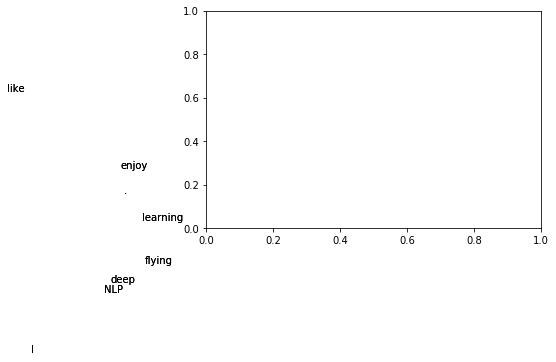

In [10]:
import numpy as np
import matplotlib.pyplot as plt
la=np.linalg
words=['I','like','enjoy','deep','learning','NLP','flying','.']
x=np.array([[0,2,1,0,0,0,0,0],
            [2,0,0,1,0,1,0,0],
            [1,0,0,0,0,0,1,0],
            [0,1,0,0,1,0,0,0],
            [0,0,0,1,0,0,0,1],
            [0,1,0,0,0,0,0,1],
            [0,0,1,0,0,0,0,1],
            [0,0,0,0,1,1,1,0]
           ])
U,s,Vh=la.svd(x,full_matrices=False)
for i in range(len(words)):
    plt.text(U[i,0],U[i,1],words[i])
plt.show()

In [11]:
U

array([[ -5.24124930e-01,  -5.72859145e-01,   9.54463014e-02,
          3.83228493e-01,  -1.76963375e-01,  -1.76092183e-01,
         -4.19185600e-01,  -5.57702732e-02],
       [ -5.94438071e-01,   6.30120664e-01,  -1.70207779e-01,
          3.10038363e-01,   1.84062339e-01,  -2.34777849e-01,
          1.29535474e-01,   1.36813128e-01],
       [ -2.56274005e-01,   2.74017533e-01,   1.59810848e-01,
         -5.55111512e-16,  -5.78984617e-01,   6.36550929e-01,
         -6.10622664e-16,  -3.05414877e-01],
       [ -2.85637408e-01,  -2.47912130e-01,   3.54610324e-01,
         -7.31901294e-02,   4.45784489e-01,   8.36141432e-02,
          5.48721075e-01,  -4.68012411e-01],
       [ -1.93139313e-01,   3.38495048e-02,  -5.00790405e-01,
         -4.28462480e-01,   3.47110226e-01,   1.55483227e-01,
         -4.68663749e-01,  -4.03576557e-01],
       [ -3.05134684e-01,  -2.93988990e-01,  -2.23433593e-01,
         -1.91614246e-01,   1.27460940e-01,   4.91219408e-01,
          2.09592800e-01,   6.5